In [145]:
import sympy as sym
from sympy.vector import CoordSys3D
from sympy import Matrix, powdenest
from sympy.physics.mechanics import dynamicsymbols, init_vprinting
from sympy.solvers.ode.systems import dsolve_system
init_vprinting(use_latex=True)

In [146]:
u = sym.Symbol('u')
v = sym.Symbol('v')
u, v = dynamicsymbols('u v')
ref = CoordSys3D('ref')

# sigma = (sym.cos(u)*sym.cos(v), sym.cos(u)*sym.sin(v), sym.sin(u))
# sigma = sym.cos(u)*sym.cos(v)*ref.i + sym.cos(u)*sym.sin(v)*ref.j + sym.sin(u)*ref.k
sigma = u*ref.i + v*ref.j + u*v*ref.k
# print(sym.diff(sigma, u))
sym.diff(sigma, u).to_matrix(ref)

⎡1⎤
⎢ ⎥
⎢0⎥
⎢ ⎥
⎣v⎦

In [147]:
def tangent_plane_basis(sigma):
    return sym.diff(sigma, u).simplify(), sym.diff(sigma, v).simplify()

def first_fundamental_form(sigma):
    sigma_u, sigma_v = tangent_plane_basis(sigma)
    E = sigma_u.dot(sigma_u).simplify()
    F = sigma_u.dot(sigma_v).simplify()
    G = sigma_v.dot(sigma_v).simplify()
    I = Matrix([[E, F], [F, G]])
    return I

def normal_vector(sigma):
    sigma_u, sigma_v = tangent_plane_basis(sigma)
    N = sigma_u.cross(sigma_v).simplify().normalize().simplify()
    return N

def second_fundamental_form(sigma):
    sigma_u, sigma_v = tangent_plane_basis(sigma)
    sigma_uu = sym.diff(sigma_u, u).simplify()
    sigma_uv = sym.diff(sigma_u, v).simplify()
    assert sym.diff(sigma_v, u).simplify() == sigma_uv
    sigma_vv = sym.diff(sigma_v, v).simplify()
    N = normal_vector(sigma)
    e = sigma_uu.cross(N).simplify()
    f = sigma_uv.cross(N).simplify()
    g = sigma_vv.cross(N).simplify()
    II = Matrix([[e, f], [f, g]])
    return II

def christoffel_symbols(sigma):
    I = first_fundamental_form(sigma)
    E_u, E_v = sym.diff(I[0,0], u).simplify(), sym.diff(I[0,0], v).simplify()
    F_u, F_v = sym.diff(I[0,1], u).simplify(), sym.diff(I[0,1], v).simplify()
    G_u, G_v = sym.diff(I[1,1], u).simplify(), sym.diff(I[1,1], v).simplify()
    system_intercepts = Matrix(
        [
            [E_u/2, E_v/2, F_v - G_u/2],
            [F_u - E_v/2, G_u/2, G_v/2]
        ]
    )
    result = ((I**(-1))*system_intercepts)
    return result

def geodesics_equations(sigma):
    ch = christoffel_symbols(sigma)
    return sym.Eq(sym.diff(sym.diff(u)) + \
        (Matrix([sym.diff(u), sym.diff(v)]).T * Matrix([[ch[0,0], ch[0,1]], [ch[0,1], ch[0,2]]]) * Matrix([sym.diff(u), sym.diff(v)]))[0].simplify(), 0), \
           sym.Eq(sym.diff(sym.diff(v)) + \
        (Matrix([sym.diff(u), sym.diff(v)]).T * Matrix([[ch[1,0], ch[1,1]], [ch[1,1], ch[1,2]]]) * Matrix([sym.diff(u), sym.diff(v)]))[0].simplify(), 0)

def find_geodesics(sigma):
    eqns = geodesics_equations(sigma)
    geo = dsolve_system(eqns)
    # geo1 = sym.dsolve(eqns[1])
    return geo

def gauss_equations(sigma):
    I  = first_fundamental_form(sigma)
    II = second_fundamental_form(sigma)
    K  = (I.det()*II.det()).simplify()
    ch = christoffel_symbols(sigma)
    
    E, F, G = I[0,0], I[0,1], I[1,1]

    eq1 = sym.Eq(E*K, sym.diff(ch[0,0], v) - sym.diff(ch[1,1], u) + ch[0,0]*ch[1,1] - ch[0,1]*ch[1,0] + ch[1,0]*ch[1,2] - ch[1,1]*ch[1,1])

def covariant_derivative(sigma, field, dir):
    # primer calculem la derivada "total"
    sigma_u, sigma_v = tangent_plane_basis(sigma)
    total_derivative_along_dir = ...
    # llavors li restem la component normal
    N = normal_vector(sigma)
    covariant_derivative = total_derivative_along_dir - total_derivative_along_dir.dot(N).simplify()*N
    # et voilà! tenim la derivada covariant
    covariant_derivative = covariant_derivative.simplify()
    return covariant_derivative

# sym.expand_trig(normal_vector(sigma))
# I = first_fundamental_form(sigma)
# I_u = sym.diff(I, u)
# I_v = sym.diff(I, v)
A = christoffel_symbols(sigma)
A = sym.expand_trig(A)
A = sym.trigsimp(A)
# sym.diff(sym.diff(u))+(Matrix([sym.diff(u), sym.diff(v)]).T * Matrix([[A[0,0], A[0,1]], [A[0,1], A[0,2]]]) * Matrix([sym.diff(u), sym.diff(v)]))[0]
A

⎡    ⎛ 2    ⎞          2        ⎤
⎢    ⎝u  + 1⎠⋅v       u ⋅v      ⎥
⎢0  ─────────── - ───────────  0⎥
⎢    2    2        2    2       ⎥
⎢   u  + v  + 1   u  + v  + 1   ⎥
⎢                               ⎥
⎢    ⎛ 2    ⎞            2      ⎥
⎢    ⎝v  + 1⎠⋅u       u⋅v       ⎥
⎢0  ─────────── - ───────────  0⎥
⎢    2    2        2    2       ⎥
⎣   u  + v  + 1   u  + v  + 1   ⎦

In [160]:
def tangent_plane_basis(sigma):
    return sym.diff(sigma, u).simplify(), sym.diff(sigma, v).simplify()

def first_fundamental_form(sigma):
    sigma_u, sigma_v = tangent_plane_basis(sigma)
    E = sigma_u.dot(sigma_u).simplify()
    F = sigma_u.dot(sigma_v).simplify()
    G = sigma_v.dot(sigma_v).simplify()
    I = Matrix([[E, F], [F, G]])
    return I

def normal_vector(sigma):
    sigma_u, sigma_v = tangent_plane_basis(sigma)
    N = sigma_u.cross(sigma_v).simplify().normalize().simplify()
    return N

def second_fundamental_form(sigma):
    sigma_u, sigma_v = tangent_plane_basis(sigma)
    sigma_uu = sym.diff(sigma_u, u).simplify()
    sigma_uv = sym.diff(sigma_u, v).simplify()
    assert sym.diff(sigma_v, u).simplify() == sigma_uv
    sigma_vv = sym.diff(sigma_v, v).simplify()
    N = normal_vector(sigma)
    e = sigma_uu.dot(N).simplify()
    f = sigma_uv.dot(N).simplify()
    g = sigma_vv.dot(N).simplify()
    II = Matrix([[e, f], [f, g]])
    return II

def christoffel_symbols(sigma):
    I = first_fundamental_form(sigma)
    E_u, E_v = sym.diff(I[0,0], u).simplify(), sym.diff(I[0,0], v).simplify()
    F_u, F_v = sym.diff(I[0,1], u).simplify(), sym.diff(I[0,1], v).simplify()
    G_u, G_v = sym.diff(I[1,1], u).simplify(), sym.diff(I[1,1], v).simplify()
    system_intercepts = Matrix(
        [
            [E_u/2, E_v/2, F_v - G_u/2],
            [F_u - E_v/2, G_u/2, G_v/2]
        ]
    )
    result = ((I**(-1))*system_intercepts)
    return result

def geodesics_equations(sigma):
    ch = christoffel_symbols(sigma)
    return sym.Eq(sym.diff(sym.diff(u)) + \
        (Matrix([sym.diff(u), sym.diff(v)]).T * Matrix([[ch[0,0], ch[0,1]], [ch[0,1], ch[0,2]]]) * Matrix([sym.diff(u), sym.diff(v)]))[0].simplify(), 0), \
           sym.Eq(sym.diff(sym.diff(v)) + \
        (Matrix([sym.diff(u), sym.diff(v)]).T * Matrix([[ch[1,0], ch[1,1]], [ch[1,1], ch[1,2]]]) * Matrix([sym.diff(u), sym.diff(v)]))[0].simplify(), 0)

def find_geodesics(sigma):
    eqns = geodesics_equations(sigma)
    geo = dsolve_system(eqns)
    # geo1 = sym.dsolve(eqns[1])
    return geo

def gauss_equations(sigma):
    I  = first_fundamental_form(sigma)
    II = second_fundamental_form(sigma)
    K  = (II.det()/I.det()).simplify()
    E, F, G = I[0,0], I[0,1], I[1,1]
    # E, F, G, K = sym.symbols('E,F,G,K')
    ch = christoffel_symbols(sigma)
    

    eq1 = sym.Eq(E*K, sym.diff(ch[0,0], v) - sym.diff(ch[1,1], u) + ch[0,0]*ch[1,1] - ch[0,1]*ch[1,0] + ch[1,0]*ch[1,2] - ch[1,1]*ch[1,1])
    eq2 = sym.Eq(F*K, sym.diff(ch[0,1], u) - sym.diff(ch[0,0], v) + ch[1,1]*ch[0,1] - ch[1,0]*ch[0,2])
    eq3 = sym.Eq(G*K, sym.diff(ch[0,2], u) - sym.diff(ch[0,1], v) + ch[0,0]*ch[0,2] + ch[0,1]*ch[1,2] - ch[0,1]*ch[0,1] - ch[1,1]*ch[0,2])
    return eq1, eq2, eq3

def covariant_derivative(sigma, field, dir):
    # primer calculem la derivada "total"
    sigma_u, sigma_v = tangent_plane_basis(sigma)
    total_derivative_along_dir = ...
    # llavors li restem la component normal
    N = normal_vector(sigma)
    covariant_derivative = total_derivative_along_dir - total_derivative_along_dir.dot(N).simplify()*N
    # et voilà! tenim la derivada covariant
    covariant_derivative = covariant_derivative.simplify()
    return covariant_derivative

# sym.expand_trig(normal_vector(sigma))
# I = first_fundamental_form(sigma)
# I_u = sym.diff(I, u)
# I_v = sym.diff(I, v)
A = christoffel_symbols(sigma)
# A = sym.expand_trig(A)
# A = sym.trigsimp(A)
A = sym.factor(A).cancel()
# sym.diff(sym.diff(u))+(Matrix([sym.diff(u), sym.diff(v)]).T * Matrix([[A[0,0], A[0,1]], [A[0,1], A[0,2]]]) * Matrix([sym.diff(u), sym.diff(v)]))[0]
A

⎡        v        ⎤
⎢0  ───────────  0⎥
⎢    2    2       ⎥
⎢   u  + v  + 1   ⎥
⎢                 ⎥
⎢        u        ⎥
⎢0  ───────────  0⎥
⎢    2    2       ⎥
⎣   u  + v  + 1   ⎦

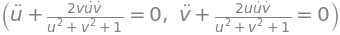

In [161]:
geodesics_equations(sigma)

In [162]:
sym.cancel(sym.factor(gauss_equations(sigma)))

(True, True, True)

In [138]:
# find_geodesics(sigma) # Does not work!